<a href="https://colab.research.google.com/github/duonghiepit/Non-Linear-Regression/blob/main/Overview_Non_Linear_Regression_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.Load Data



In [7]:
data = pd.read_csv("/content/drive/MyDrive/data/Salaries.csv")
data = data.drop('Position', axis=1).to_numpy()
data

array([[      1,   45000],
       [      2,   50000],
       [      3,   60000],
       [      4,   80000],
       [      5,  110000],
       [      6,  150000],
       [      7,  200000],
       [      8,  300000],
       [      9,  500000],
       [     10, 1000000]])

Text(0, 0.5, 'Salary')

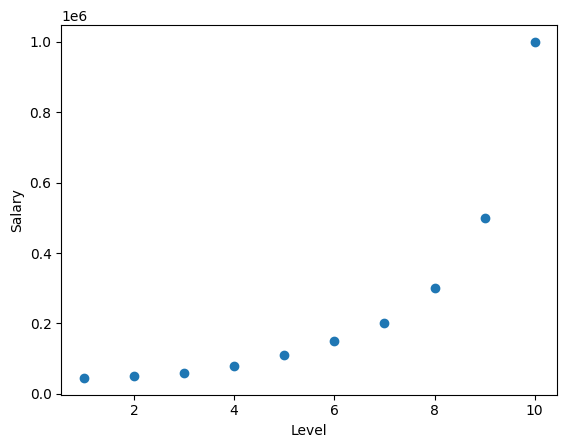

In [12]:
X = data[:, :1]
y = data[:, 1:]

plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

# 2.Linear Regression

In [13]:
def r2score(y_pred, y):
  rss = np.sum((y-y_pred)**2)
  tss = np.sum((y-np.mean(y))**2)
  r2 = 1-rss/tss
  return r2

In [46]:
class LinearRegression:
  def __init__(self, X_data, y_target, learning_rate, num_epochs):
    self.X_data = X_data
    self.y_target = y_target
    self.learning_rate = learning_rate
    self.num_epochs = num_epochs
    self.num_samples = self.X_data.shape[0]

    #Initial Coeficients
    self.theta = np.random.randn(self.X_data.shape[1]).reshape((self.X_data.shape[1], 1))
    self.losses = []

  def predict(self, X_data):
    y_pred = self.X_data.dot(self.theta)
    return y_pred

  def compute_loss(self, y_pred, y_target):
    loss = (y_pred-y_target)**2
    loss = np.mean(loss)
    return loss

  def fit(self):
    for epoch in range(self.num_epochs):
      #predict
      y_pred = self.predict(self.X_data)

      #compute loss
      loss = self.compute_loss(y_pred, self.y_target)
      self.losses.append(loss)

      #compute gradient
      k = 2*(y_pred - self.y_target)
      gradients = self.X_data.T.dot(k)/self.num_samples

      #update weight
      self.theta = self.theta - self.learning_rate * gradients

      print(f'Epoch: {epoch} - Loss: {loss}')
    return {
        'loss': sum(self.losses)/len(self.losses),
        'weight': self.theta
    }

In [47]:
X_linear = np.c_[np.ones((len(X), 1)), X]
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [48]:
learning_rate = 0.01
num_epoch = 10000

In [49]:
linear_model = LinearRegression(X_linear, y, learning_rate, num_epoch)
linear_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 5000 - Loss: 26695878787.878784
Epoch: 5001 - Loss: 26695878787.878777
Epoch: 5002 - Loss: 26695878787.878788
Epoch: 5003 - Loss: 26695878787.878788
Epoch: 5004 - Loss: 26695878787.878784
Epoch: 5005 - Loss: 26695878787.878784
Epoch: 5006 - Loss: 26695878787.878777
Epoch: 5007 - Loss: 26695878787.878784
Epoch: 5008 - Loss: 26695878787.878788
Epoch: 5009 - Loss: 26695878787.87879
Epoch: 5010 - Loss: 26695878787.87879
Epoch: 5011 - Loss: 26695878787.87879
Epoch: 5012 - Loss: 26695878787.87879
Epoch: 5013 - Loss: 26695878787.878784
Epoch: 5014 - Loss: 26695878787.87879
Epoch: 5015 - Loss: 26695878787.87879
Epoch: 5016 - Loss: 26695878787.878784
Epoch: 5017 - Loss: 26695878787.87879
Epoch: 5018 - Loss: 26695878787.87879
Epoch: 5019 - Loss: 26695878787.878784
Epoch: 5020 - Loss: 26695878787.87879
Epoch: 5021 - Loss: 26695878787.87879
Epoch: 5022 - Loss: 26695878787.878784
Epoch: 5023 - Loss: 26695878787.878784
Epoch: 5024 - Los

{'loss': 26812263032.444622,
 'weight': array([[-195333.33333333],
        [  80878.78787879]])}

In [22]:
y_pred = linear_model.predict(X_linear)

In [23]:
r2score(y_pred, y)

0.6690412331929895

In [24]:
linear_model.theta

array([[-195333.33333333],
       [  80878.78787879]])

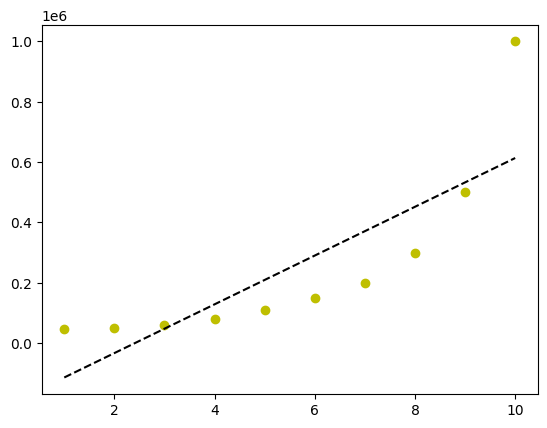

In [25]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

# 3.Polymial Regression

In [26]:
def create_polynomial_features(X, degree = 2):
  X_new = X
  for d in range(2, degree+1):
    X_new = np.c_[X_new, np.power(X, d)]
  return X_new

## 3.1.  Polynomial Regression with degree = 2

In [34]:
X_poly = create_polynomial_features(X, 2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [35]:
X_poly = np.c_[np.ones((len(X_poly), 1)), X_poly]
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [50]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 5000 - Loss: 10675942774.373816
Epoch: 5001 - Loss: 10675822922.949255
Epoch: 5002 - Loss: 10675703097.452099
Epoch: 5003 - Loss: 10675583297.857014
Epoch: 5004 - Loss: 10675463524.138693
Epoch: 5005 - Loss: 10675343776.271862
Epoch: 5006 - Loss: 10675224054.231258
Epoch: 5007 - Loss: 10675104357.991665
Epoch: 5008 - Loss: 10674984687.527887
Epoch: 5009 - Loss: 10674865042.814753
Epoch: 5010 - Loss: 10674745423.827118
Epoch: 5011 - Loss: 10674625830.539862
Epoch: 5012 - Loss: 10674506262.927898
Epoch: 5013 - Loss: 10674386720.966167
Epoch: 5014 - Loss: 10674267204.629635
Epoch: 5015 - Loss: 10674147713.893286
Epoch: 5016 - Loss: 10674028248.732147
Epoch: 5017 - Loss: 10673908809.121258
Epoch: 5018 - Loss: 10673789395.03569
Epoch: 5019 - Loss: 10673670006.450552
Epoch: 5020 - Loss: 10673550643.340958
Epoch: 5021 - Loss: 10673431305.682062
Epoch: 5022 - Loss: 10673311993.449043
Epoch: 5023 - Loss: 10673192706.617117
Epoch: 5

{'loss': 11093714775.317799,
 'weight': array([[ 14601.48008575],
        [-47838.36227643],
        [ 12584.36042934]])}

In [51]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8736082695975734

In [55]:
theta_poly = poly_model.theta
theta_poly

array([[ 14601.48008575],
       [-47838.36227643],
       [ 12584.36042934]])

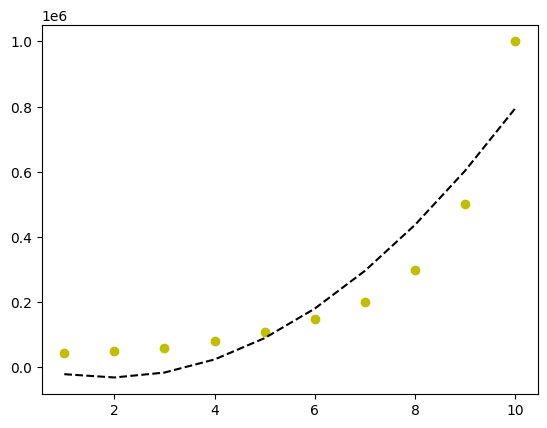

In [56]:
X_plot = data[:, :1]
y_func = theta_poly[0] + theta_poly[1]*X_plot + theta_poly[2]*X_plot**2
plt.plot(X_plot, y, 'yo', X_plot, y_func, '--k')
plt.show()

## 3.2. Polynomial Regression with degree = 3

In [57]:
X_poly = create_polynomial_features(X, 3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [58]:
X_poly = np.c_[np.ones((len(X_poly), 1)), X_poly]
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [62]:
poly_model = LinearRegression(X_poly, y, 0.0000001, 100000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 95000 - Loss: 5469637983.706105
Epoch: 95001 - Loss: 5469634480.330951
Epoch: 95002 - Loss: 5469630977.039723
Epoch: 95003 - Loss: 5469627473.83243
Epoch: 95004 - Loss: 5469623970.70905
Epoch: 95005 - Loss: 5469620467.66959
Epoch: 95006 - Loss: 5469616964.714052
Epoch: 95007 - Loss: 5469613461.842429
Epoch: 95008 - Loss: 5469609959.054711
Epoch: 95009 - Loss: 5469606456.350906
Epoch: 95010 - Loss: 5469602953.731003
Epoch: 95011 - Loss: 5469599451.195012
Epoch: 95012 - Loss: 5469595948.742922
Epoch: 95013 - Loss: 5469592446.374731
Epoch: 95014 - Loss: 5469588944.090438
Epoch: 95015 - Loss: 5469585441.890038
Epoch: 95016 - Loss: 5469581939.773522
Epoch: 95017 - Loss: 5469578437.740911
Epoch: 95018 - Loss: 5469574935.792176
Epoch: 95019 - Loss: 5469571433.927329
Epoch: 95020 - Loss: 5469567932.146357
Epoch: 95021 - Loss: 5469564430.449283
Epoch: 95022 - Loss: 5469560928.836073
Epoch: 95023 - Loss: 5469557427.306749
Epoch: 950

{'loss': 5930293056.426164,
 'weight': array([[  184.9356513 ],
        [ -325.13719577],
        [-3533.36324092],
        [ 1227.18721913]])}

In [63]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.9323956321316796

In [65]:
new_t = poly_model.theta
new_t

array([[  184.9356513 ],
       [ -325.13719577],
       [-3533.36324092],
       [ 1227.18721913]])

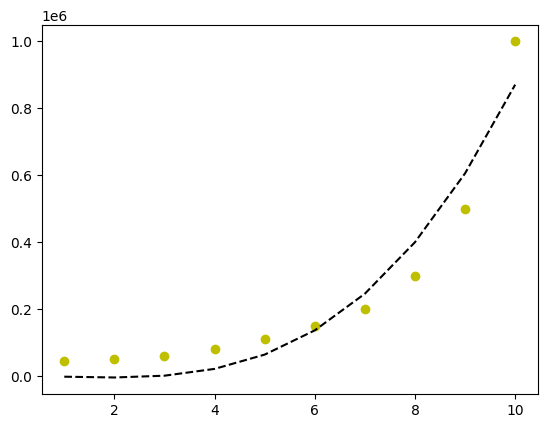

In [68]:
X_plot = data[:, :1]
y_func = new_t[0] + new_t[1]*X_plot + new_t[2]*X_plot**2 + new_t[3]*X_plot**3
plt.plot(X_plot, y, 'yo', X_plot, y_func, '--k')
plt.show()